# Assignment 1, Q2, Extragalactic Astronomy
Nasser Mohammed

Feburary 3rd, 2025

>The purpose of this question is to familiarize you with spectral synthesis modelling. Spectral synthesis is an essential tool needed to understand how galaxies evolve

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
plt.style.use('dark_background')

In [5]:
import os
os.environ["SPS_HOME"] = "/Users/nasserm/Documents/vscode/extragalactic/fsps"
from fsps import StellarPopulation as stp


>Assume that a local galaxy with a stellar mass of $10^{10.4}$ Msun was born at z=5.1, and has been forming
>stars with an exponentially declining star formation history with an e-folding timescale of 6 Gyr.

Key Values:
- Stellar Mass of Galaxy : $10^{10.4}$
- Born at z = 5.1
- e-folding timescale of 6 Gyr

## 2.1

> What is the current star-formation rate of the galaxy? What was its star-formation rate at z=3?

From (Conroy, Gunn, & White, 2009), equation 5,

$$\Psi(t) = \frac{1-C}{\tau} \frac{e^{-t/\tau}}{e^{-T_{\text{start}}/\tau} - e^{-T_{\text{univ}}/\tau}}+\frac{C}{T_{\text{univ}}-T_{\text{start}}},$$

gives us the star formation rate that commenced at some epoch $T_\text{start}$. C is the fraction of mass formed in a constant mode of star formation, and we will set this to 0 because we are modelling an exponentially declining star formation history. $\tau$ is the e-folding timescale, for this question it is 6 GYr. Because this is currently normalized such that 1 M $_{\odot}$ is formed by T $_\text{univ}$, we will multiply $\Psi(t)$ by $10^{10.4} \text{M}_{\odot}$.

In [17]:
def Psi_t(t, tau, T_start, T_univ):
    return 1/tau * np.exp(-t/tau)/(np.exp(-T_start/tau) - np.exp(-T_univ/tau))

In [26]:
from astropy.cosmology import WMAP9 as cosmo

T_start = cosmo.age(5.1).value
T_univ_today = cosmo.age(0).value
T_univ_z3 = cosmo.age(3).value
tau = 6

sfr_z0 = Psi_t(T_univ_today, tau, T_start, T_univ_today)
sfr_z3 = Psi_t(T_univ_z3, tau, T_start, T_univ_today)

print(f'the normalized star forming rate at z=0 is: {sfr_z0:.3e} solar masses per year')
print(f'the normalized star forming rate at z=3 is: {sfr_z3:.3e} solar masses per year')

the normalized star forming rate at z=0 is: 2.322e-02 solar masses per year
the normalized star forming rate at z=3 is: 1.603e-01 solar masses per year


In [34]:
sp = stp(compute_vega_mags=False, 
                            zcontinuous=0, #continuous star formation history, I want exponential. Burst is zcontinous = 0
                            sfh=1, 
                            tau=6,
                            sf_start=0,
                            logzsol=0.0, 
                            dust_type=2, 
                            dust2=0.2,
                            tage=cosmo.age(0).value-cosmo.age(5.1).value)

In [ ]:
sp.sfr_age(times=())

In [41]:
sp.sfr

np.float64(1.2810895869276086e-10)

In [35]:
print(f'The age of our galaxy today is {cosmo.age(0).value-cosmo.age(5.1).value:.4} Gyrs')

The age of our galaxy today is 12.61 Gyrs


In [ ]:
fluxes = 10 ** (-0.4 * np.array(magnitudes))

# Sum the fluxes
total_flux = np.sum(fluxes)

# Convert the total flux back to magnitude
summed_magnitude = -2.5 * np.log10(total_flux)

print(f"Summed Magnitude: {summed_magnitude}")

In [23]:
g_band = ['sdss_g']

In [29]:
#Making it the mass of the MW

-2.5*np.log10(10**10.4) + sp.get_mags(tage=12.64,
                                        redshift=5.1, 
                                        bands=g_band)

array([31.59053651])

In [110]:
sp.formed_mass

np.float64(1.0)

In [30]:
# Calculate the age of the universe at z=0 (now) and z=3
age_now = cosmo.age(0).value  # Age of the universe now in Gyr
age_at_z3 = cosmo.age(3).value  # Age of the universe at z=3 in Gyr
age_at_birth = cosmo.age(5.1).value  # Age of the universe when galaxy was born

# Calculate the age of the galaxy now and at z=3
galaxy_age_now = age_now - age_at_birth  # Galaxy's age now in Gyr
galaxy_age_at_z3 = age_at_z3 - age_at_birth  # Galaxy's age at z=3 in Gyr

# Get the star formation rate based on the exponentially declining model
# SFR(t) ∝ exp(-t/τ) where τ is the e-folding timescale (6 Gyr)
# Normalize by the total stellar mass of 10^10.4 M☉

# Get the current SFR at z=0 using the get_sfr method
sp.params['tau'] = 6  # Make sure tau is set to 6 Gyr
current_sfr = sp.sfr * (10**10.4)  # in M☉/yr

# Get the SFR at z=3
sp.params['sfh'] = 1  # Make sure we're using exponential decline model
# Store current age
current_age = sp.params['tage']
# Set the age to galaxy's age at z=3
sp.params['tage'] = galaxy_age_at_z3
# Get SFR at z=3
sfr_at_z3 = sp.sfr * (10**10.4)  # in M☉/yr
# Restore original age
sp.params['tage'] = current_age

print(f"Current star formation rate (z=0): {current_sfr:.2f} M☉/year")
print(f"Star formation rate at z=3: {sfr_at_z3:.2f} M☉/year")
print(f"Galaxy age at z=3: {galaxy_age_at_z3:.2f} Gyr")
print(f"Galaxy age now (z=0): {galaxy_age_now:.2f} Gyr")

Current star formation rate (z=0): 0.58 M☉/year
Star formation rate at z=3: 22.66 M☉/year
Galaxy age at z=3: 1.02 Gyr
Galaxy age now (z=0): 12.61 Gyr


In [ ]:
sp.formed_mass

AttributeError: 'StellarPopulation' object has no attribute 'get_sfr'

## 2.2
> Plot the rest frame g-band magnitude of the galaxy as a function of redshift, from z=0.1 to z=5.

- Could mean that I want the magnitude as a function of red shift, aka moving a galaxy of age X from z=0.1 to z=5
- or, galaxy is age X at z=5, and it age Y at z=0.1, and it is forming stars throughout this time
    - the latter has more to do with star forming history, but the former is easier


In [31]:
z_array = np.linspace(0.1, 4.95, 500)

g_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=g_band) for z in z_array])



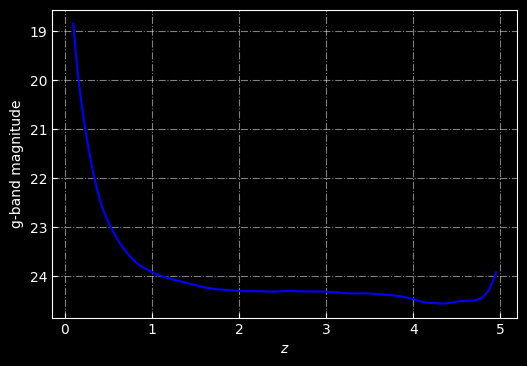

In [32]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-band magnitude')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


## 2.3
> Plot the rest frame (g-r) color of the galaxy as a function of redshift over range z=0.1 to z=5.


In [33]:

r_band = ['sdss_r']

r_band_mag_z = np.asarray([-2.5*np.log10(10**10.4) + sp.get_mags(tage=cosmo.age(z).value-cosmo.age(5.1).value,
                                        redshift=z, 
                                        bands=r_band) for z in z_array])



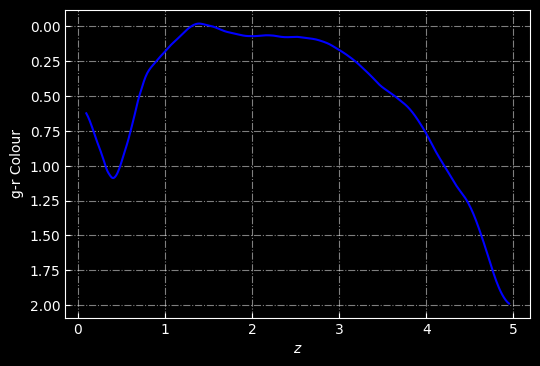

In [60]:
plt.figure(figsize=(6, 4))
plt.plot(z_array, g_band_mag_z-r_band_mag_z, c='b')
plt.xlabel(r'$z$')
plt.ylabel(r'g-r Colour')
plt.tick_params(direction='in')
plt.grid(ls = '-.', alpha=0.5)
plt.gca().invert_yaxis()


## 2.4

>  Repeat 1-3 above assuming the galaxy’s star-formation history had an e-folding timescale of 0.5 Gyr.